<h1>Data Visualization</h1>

<h3>To begin, import the relevant libraries to create a data visualization</h3>

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



<h3>Then, read your data into a Pandas Data Frame.</h3>

In [2]:
#read data into dataframe

df = pd.read_csv('https://cocl.us/datascience_survey_data',index_col = 0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
#sort values by "Very Interested"

df.sort_values(by=['Very interested'], ascending=False, axis= 0, inplace = True)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [4]:
#convert data to percentages and store them in a new data frame

percentages=[]
for interest in df:
    percent = (df[interest]/2233)*100
    roundpercent = round(percent,2)
    percentages.append(roundpercent)

percentagedf = pd.DataFrame(percentages).transpose()
percentagedf

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


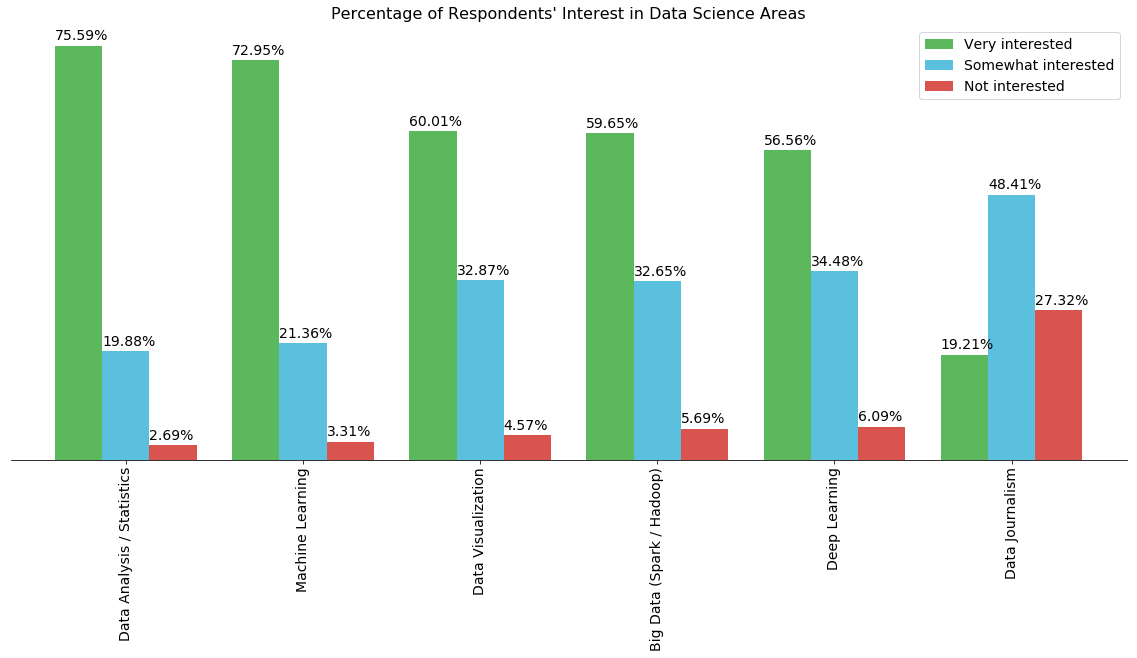

In [75]:
#create a bar chat using the artist layer of matplotlib

ax = percentagedf.plot( kind= 'bar', width = 0.8, figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f'])
ax.set_title('Percentage of Respondents\' Interest in Data Science Areas',fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.legend(fontsize=14)
ax.tick_params(labelsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    patch = ax.annotate('{}%'.format(height),(x, y/height*100 + height + 1))
    patch.set_fontsize(14)

plt.show()

In [89]:
#read data into a dataframe
df_crime = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

In [140]:
#group dataframe by Neighborhood
df_groupedcrime = df_crime.groupby('PdDistrict', axis=0).count()
df_groupedcrime = df_groupedcrime.reset_index()
df_groupedcrime = df_groupedcrime[['PdDistrict','IncidntNum']]
df_groupedcrime = df_groupedcrime.rename(columns={"PdDistrict": "Neighborhood", "IncidntNum": "Count"})

df_groupedcrime.sort_values(by = ['Count'], ascending = False)

,Neighborhood,Count
7,SOUTHERN,28445
4,NORTHERN,20100
3,MISSION,19503
1,CENTRAL,17666
0,BAYVIEW,14303
2,INGLESIDE,11594
8,TARAVAL,11325
9,TENDERLOIN,9942
6,RICHMOND,8922
5,PARK,8699
